#  Time Series Random Data with SARIMA

In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from pandas import Series
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

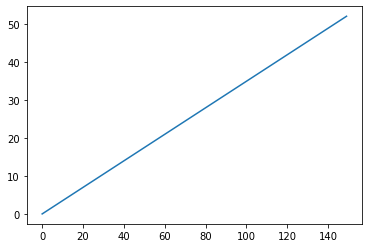

In [2]:
time = np.arange(150)
values = time*0.35

plt.plot(time, values)

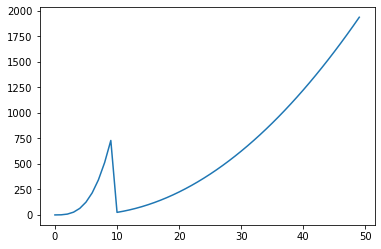

In [3]:
time = np.arange(50)
values = np.where(time < 10, time**3, (time-5)**2)

plt.plot(time, values)

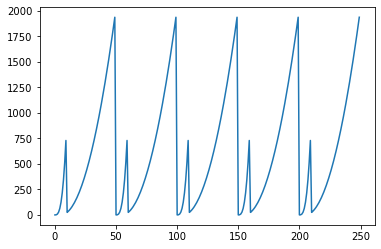

In [4]:
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])

time = np.arange(250)

plt.plot(time, seasonal)

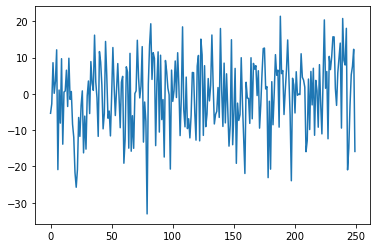

In [5]:
noise=np.random.randn(250)*10

plt.plot(time, noise)

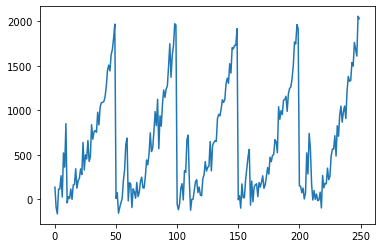

In [6]:
noise = np.random.randn(250)*100
seasonal_noise = seasonal+noise

plt.plot(time, seasonal_noise)

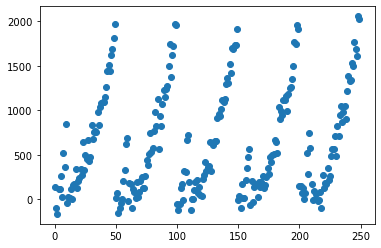

In [7]:
plt.scatter(time, seasonal_noise)

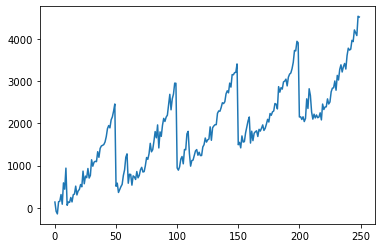

In [8]:
seasonal_noise_trend = seasonal_noise + np.arange(250)*10

plt.plot(time, seasonal_noise_trend)

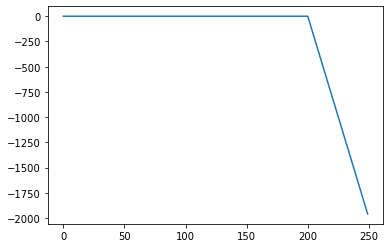

In [9]:
moon = np.zeros(250)
moon[-50:] = np.arange(50)*-40

plt.plot(time, moon)

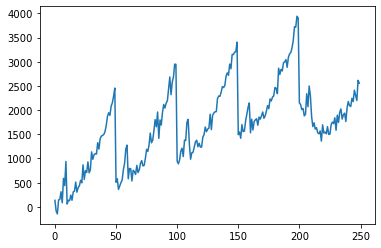

In [10]:


ns_time_series=seasonal_noise_trend+moon

plt.plot(time, ns_time_series)



In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ns_time_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.942703
p-value: 0.040603


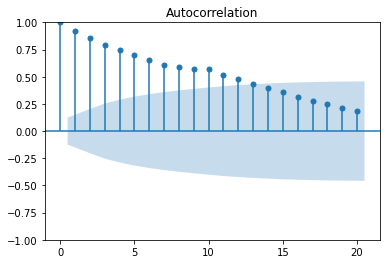

In [12]:
acf_plot = plot_acf(ns_time_series, lags=20)

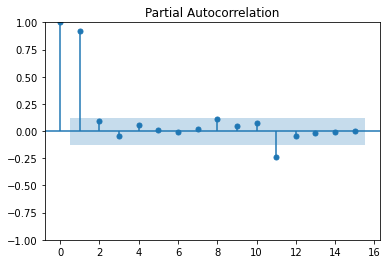

In [13]:
pacf_plot = plot_pacf(ns_time_series, lags=15, method="ywm")

###  This data needs differencing but based on ACF and PACF AR 2, 10, 11 might work.  

####  Create a differenced series to make the data stationary

In [14]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

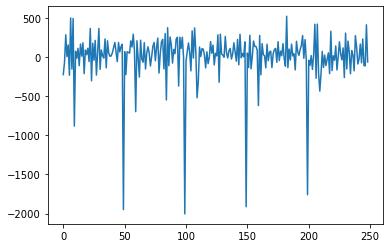

In [15]:
series=ns_time_series#.values
X = series
diff = difference(X)
plt.plot(diff)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.118347
p-value: 0.000013


In [17]:
ns_time_series
diff1 = np.diff(ns_time_series)
diff2 = np.diff(ns_time_series, n=2)
diff3 = np.diff(ns_time_series, n=3)
diff4 = np.diff(ns_time_series, n=4)
diff5 = np.diff(ns_time_series, n=5)
diff6 = np.diff(ns_time_series, n=6)
diff7 = np.diff(ns_time_series, n=7)
diff8 = np.diff(ns_time_series, n=8)

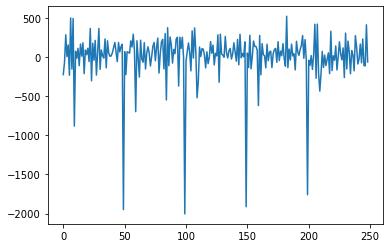

In [18]:
plt.plot(diff1)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.118347
p-value: 0.000013


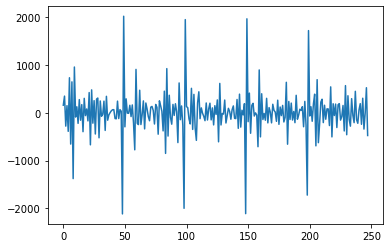

In [20]:
plt.plot(diff2)
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.301679
p-value: 0.000000


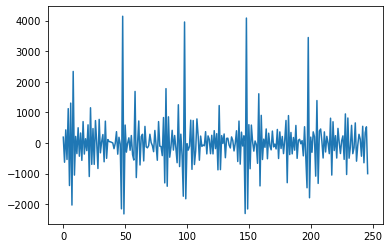

In [22]:
plt.plot(diff3)
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.329536
p-value: 0.000000


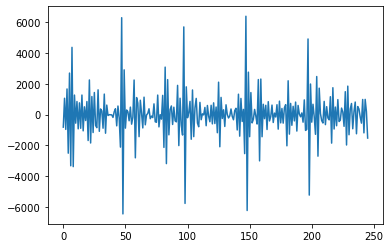

In [24]:
plt.plot(diff4)
plt.show()

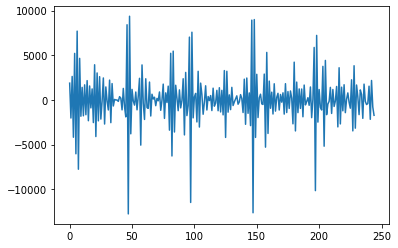

In [25]:
plt.plot(diff5)
plt.show()

###  Diff2 looks the best option. Next section is working with Diff2 data.

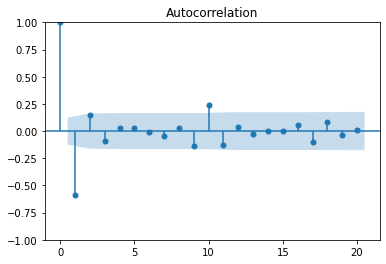

In [26]:
#  Redo ACF with Diff2
acf_plot = plot_acf(diff2, lags=20)

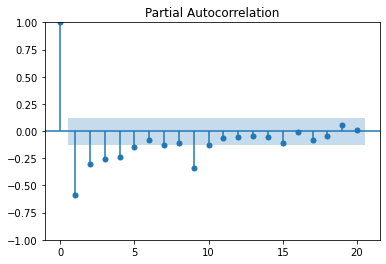

In [27]:
#  Redo PACF with Diff2
pacf_plot = plot_pacf(diff2, lags=20, method="ywm")

<AxesSubplot:>

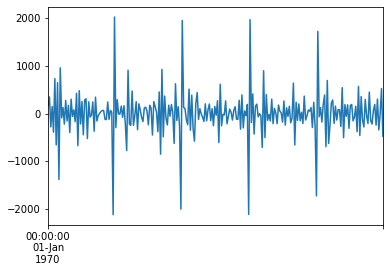

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.DataFrame(diff2)

df.index = pd.to_datetime(df.index)

decomposition = seasonal_decompose(df, model='additive', period = 1)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


trend.plot()


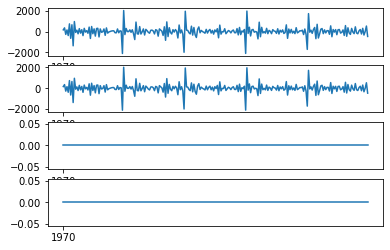

In [29]:
fig, ax = plt.subplots(4)
ax[0].plot(df.index, diff2)
ax[1].plot(df.index, trend)
ax[2].plot(df.index, seasonal)
ax[3].plot(df.index, residual)

##  ARIMA model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
diff2.shape

(248,)

In [30]:


train_data = diff2[0:223]
test_data = diff2[224:247]

In [141]:
model = ARIMA(train_data, order=(10,2,10))

In [142]:
from time import time
import warnings
warnings.filterwarnings("ignore")
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 1.4804255962371826


In [143]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:               ARIMA(10, 2, 10)   Log Likelihood               -1614.054
Date:                Thu, 27 Oct 2022   AIC                           3270.108
Time:                        12:00:03   BIC                           3341.469
Sample:                             0   HQIC                          3298.922
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.3719      0.627     -5.379      0.000      -4.601      -2.143
ar.L2         -6.9425      1.942     -3.576      0.000     -10.748      -3.137
ar.L3        -10.0919      3.715     -2.716      0.0

In [144]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start, end,
                             typ = 'levels')#.rename("Predictions")
#model_fit.predict(test_data)
residuals = test_data - predictions

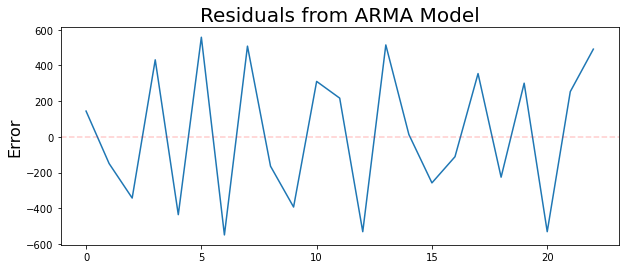

In [145]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0.5, 1.0, '"2nd Difference ARIMA"')

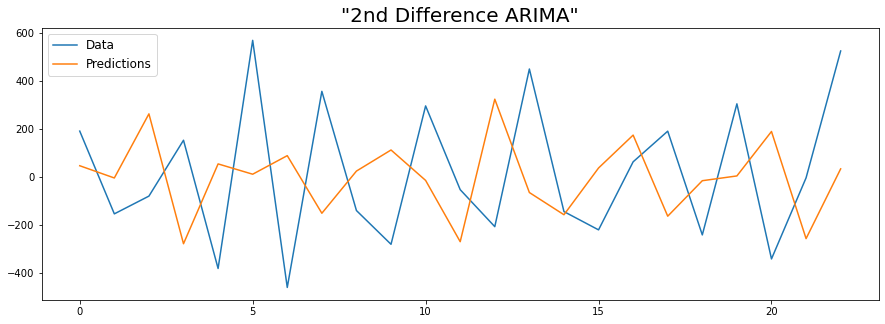

In [198]:
plt.figure(figsize=(15,5))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=12)

plt.title('"2nd Difference ARIMA"', fontsize=20)
#plt.ylabel('Sales', fontsize=16)

In [348]:
y_bottom = -500
y_top = 600
plt.figure(figsize=(15,5))

plt.plot(test_data, y1s)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=12)

plt.title('"2nd Difference ARIMA"', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
#plot_pred('ARMA-ARIMA(1,0,1)', arma_model1_fit, y1s, 'y1s', y_bottom, y_top

NameError: name 'y1s' is not defined

<Figure size 1080x360 with 0 Axes>

In [148]:


print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))



Root Mean Squared Error: 373.60676962426015


In [39]:
model=auto_arima(train_data,start_p=0,d=0,start_q=0,
          max_p=15,max_d=5,max_q=15, start_P=0,
          D=0, start_Q=0, max_P=20,max_D=5,
          max_Q=20, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3401.408, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3309.565, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3399.408, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3309.010, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3309.515, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3308.341, Time=0.41 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3310.340, Time=1.44 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3310.340, Time=1.35 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=3311.322, Time=0.23 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3311.529, Time=0.21 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=3405.254, Time=0.18 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3294.366, Time=0.16 sec
 ARIMA(2,0,0)(0,0,1)[12] inte

In [202]:
model2 = ARIMA(train_data, order=(5,0,0))

In [203]:
from time import time
import warnings
warnings.filterwarnings("ignore")
start = time()
model_fit2 = model2.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.04749464988708496


In [204]:
#summary of the model
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  223
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1624.685
Date:                Thu, 27 Oct 2022   AIC                           3263.370
Time:                        12:38:48   BIC                           3287.221
Sample:                             0   HQIC                          3272.999
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2654     11.621      0.023      0.982     -22.512      23.043
ar.L1         -0.9357      0.124     -7.539      0.000      -1.179      -0.692
ar.L2         -0.6797      0.132     -5.141      0.0

In [205]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions2 = model_fit2.predict(start, end,
                             typ = 'levels')#.rename("Predictions")
#model_fit.predict(test_data)
residuals2 = test_data - predictions2

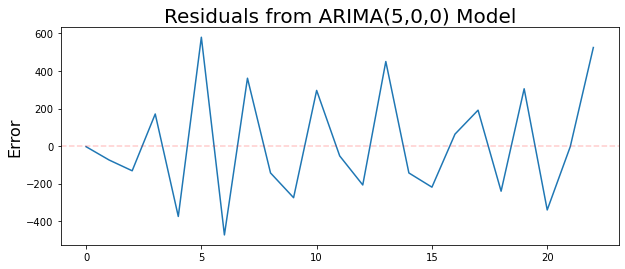

In [206]:
plt.figure(figsize=(10,4))
plt.plot(residuals2)
#plt.plot(test_data)
plt.title('Residuals from ARIMA(5,0,0) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0.5, 1.0, '"ARIMA(5,0,0) Model"')

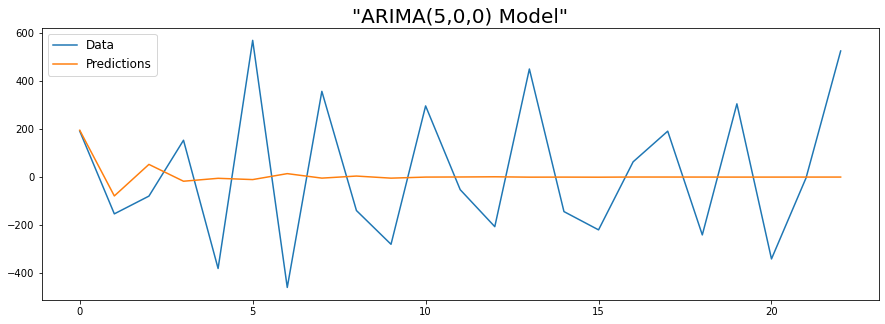

In [207]:
plt.figure(figsize=(15,5))

plt.plot(test_data)
plt.plot(predictions2)

plt.legend(('Data', 'Predictions'), fontsize=12)

plt.title('"ARIMA(5,0,0) Model"', fontsize=20)
#plt.ylabel('Sales', fontsize=16)

In [208]:


print('Root Mean Squared Error:', np.sqrt(np.mean(residuals2**2)))


Root Mean Squared Error: 292.7377456727072


###  SARIMA model

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [159]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(diff2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -10.30167913854904
2. P-Value :  3.359481084854329e-18
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 238
5. Critical Values :
	 1% :  -3.458128284586202
	 5% :  -2.873761835239286
	 10% :  -2.5732834559706235


In [275]:
# fit model
model3 = SARIMAX(train_data, order=(5, 0, 1), seasonal_order=(1, 1, 0, 9))
model_fit3 = model3.fit(disp=False)


In [276]:
pred = model_fit3.predict(end=(len(diff2)-1))


In [277]:
test_data.shape

(23,)

In [278]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions3 = model_fit3.predict(start, end,
                             typ = 'levels')#.rename("Predictions")
#model_fit.predict(test_data)
residuals3 = test_data - predictions3
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals3**2)))

Root Mean Squared Error: 353.1357700829792


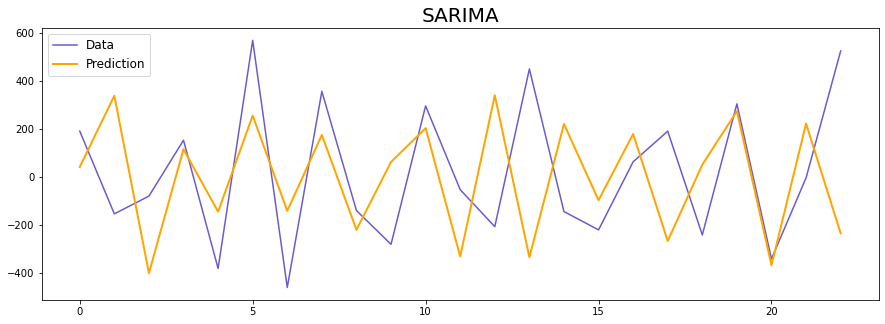

In [279]:
plt.figure(figsize=(15,5))
plt.title("SARIMA", fontsize=20)
plt.plot(test_data, color='slateblue', label='Data')
plt.plot(predictions3, color='orange', label='Prediction', linewidth=2)
plt.legend(loc="upper left", fontsize = 12)
plt.show()

TypeError: 'builtin_function_or_method' object is not subscriptable

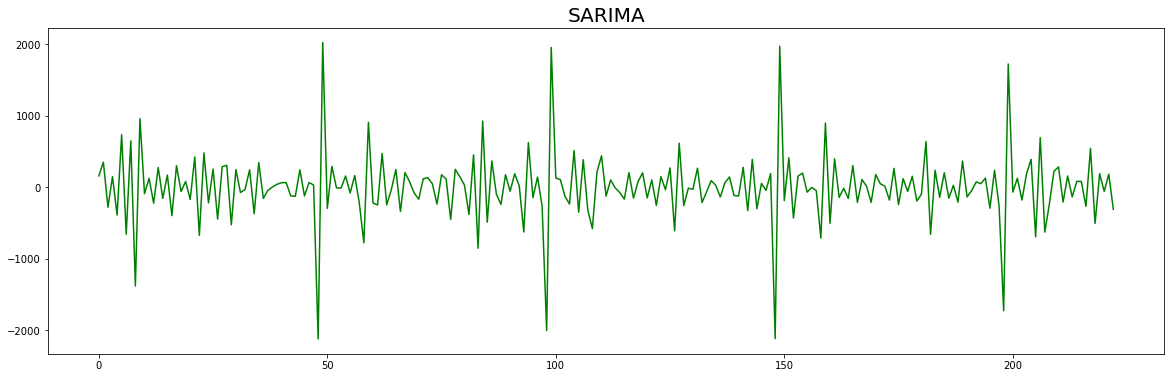

In [180]:

plt.figure(figsize=(20,6))
plt.title("SARIMA", fontsize=20)
plt.plot(train_data, color='green', label='training data - diff_2')
plt.plot(time[-23:], test_data, color='blue', label='test data')
plt.plot(pred, color='palevioletred', label='SARIMA + prediction', linewidth=3)
plt.legend(loc="upper left")
plt.show()

TypeError: 'builtin_function_or_method' object is not subscriptable

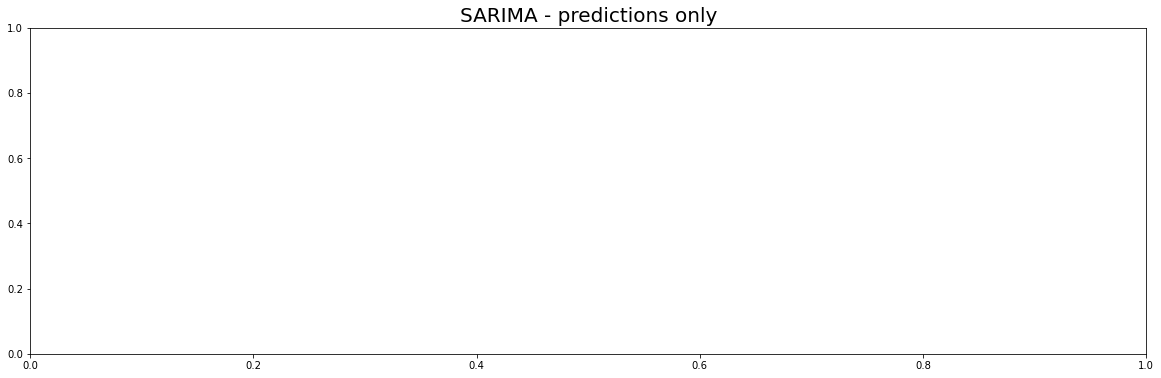

In [153]:
 #test v prediction close up
plt.figure(figsize=(20,6))
plt.title("SARIMA - predictions only", fontsize=20)
plt.plot(time[-23:], test_data, color='blue', label='test data(last 100 taken from original values)')
plt.plot(time[-23:], pred[-23:], color='palevioletred', label='SARIMA + prediction', linewidth=2)
plt.legend(loc="upper left")
plt.show()

####  Lectures provided by Huddersfield University - AI Skills Bootcamp - S.M. Riazul Islam, PhD

#### Smith, T.G. (2022) pmdarima: ARIMA estimators for Python. https://alkaline-ml.com/pmdarima/

#### Angelica Lo Duca (2021) Understanding the Seasonal Order of the SARIMA Model.  https://towardsdatascience.com/understanding-the-seasonal-order-of-the-sarima-model-ebef613e40fa